In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
#from sklearn.preprocessing import LabelEncoder

In [2]:
popis = pd.read_excel ("../../datasets/Allianz2_kolone.xlsx")

In [3]:
popis.head()

,City,GeNdeR_oF_CustoMer,Age,InCoMe,ILLness
0,Dallas,Male,41.0,40367.0,No
1,Dallas,Male,54.0,45084.0,No
2,Dallas,male,42.0,52483.0,No
3,Dallas,Male,40.0,40941.0,No
4,Dallas,male,46.0,50289.0,No


In [4]:
popis.describe()

,Age,InCoMe
count,149998.000000,149998.000000
mean,44.950126,91253.196076
std,11.572513,24989.427742
min,25.000000,-654.000000
25%,35.000000,80868.000000
50%,45.000000,93655.000000
75%,55.000000,104519.000000
max,65.000000,177157.000000


In [5]:
popis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   City                149998 non-null  object 
 1   GeNdeR_oF_CustoMer  149998 non-null  object 
 2   Age                 149998 non-null  float64
 3   InCoMe              149998 non-null  float64
 4   ILLness             150000 non-null  object 
dtypes: float64(2), object(3)
memory usage: 5.7+ MB


(array([2.2000e+01, 4.7100e+02, 3.0320e+03, 7.4670e+03, 7.5650e+03,
        6.3400e+03, 1.5527e+04, 3.6554e+04, 3.9522e+04, 1.7647e+04,
        6.0240e+03, 5.7530e+03, 3.3860e+03, 6.4800e+02, 4.0000e+01]),
 array([  -654.        ,  11200.06666667,  23054.13333333,  34908.2       ,
         46762.26666667,  58616.33333333,  70470.4       ,  82324.46666667,
         94178.53333333, 106032.6       , 117886.66666667, 129740.73333333,
        141594.8       , 153448.86666667, 165302.93333333, 177157.        ]),
 <BarContainer object of 15 artists>)

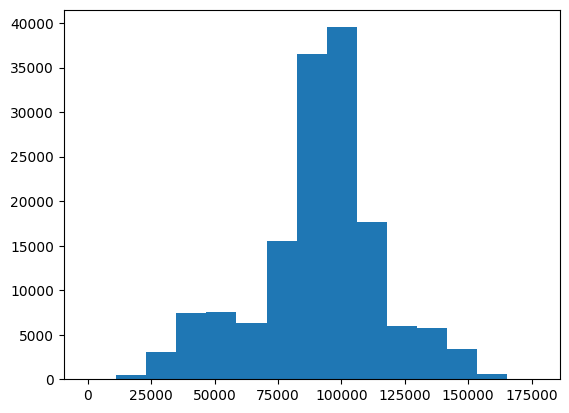

In [6]:
plt.hist (popis.InCoMe, bins = 15)

In [7]:
popis.sort_values (by = ["InCoMe"])

,City,GeNdeR_oF_CustoMer,Age,InCoMe,ILLness
245,Dallas,Female,40.0,-654.0,Yes
7896,Dallas,Female,34.0,584.0,No
18484,Dallas,Female,43.0,2474.0,No
9298,Dallas,Female,31.0,2667.0,Yes
17135,Dallas,Female,39.0,3842.0,No
...,...,...,...,...,...
109060,Mountain View,Male,61.0,173991.0,No
105281,Mountain View,Male,41.0,176746.0,No
109350,Mountain View,Male,58.0,177157.0,No
116,Dallas,Male,48.0,NaN,Yes


In [8]:
popis["InCoMe"] = popis["InCoMe"].replace({-654.0: 6540.0})

In [9]:
popis.describe()

,Age,InCoMe
count,149998.000000,149998.000000
mean,44.950126,91253.244037
std,11.572513,24989.258252
min,25.000000,584.000000
25%,35.000000,80868.000000
50%,45.000000,93655.000000
75%,55.000000,104519.000000
max,65.000000,177157.000000


In [10]:
popis.duplicated().sum()

np.int64(668)

In [11]:
popis.drop_duplicates(inplace=True)

In [12]:
popis.describe()

,Age,InCoMe
count,149330.000000,149330.000000
mean,44.947405,91241.575986
std,11.573796,25010.768465
min,25.000000,584.000000
25%,35.000000,80834.000000
50%,45.000000,93641.500000
75%,55.000000,104527.000000
max,65.000000,177157.000000


In [13]:
isna_values = popis[popis.isna().any(axis=1)]

In [14]:
isna_values

,City,GeNdeR_oF_CustoMer,Age,InCoMe,ILLness
107,NaN,Male,47.0,30382.0,No
112,Dallas,NaN,39.0,53649.0,No
114,Dallas,Male,NaN,46788.0,Yes
116,Dallas,Male,48.0,NaN,Yes
120,NaN,NaN,NaN,NaN,Yes


In [15]:
popis.rename(columns = {'GeNdeR_oF_CustoMer':'Gender'}, inplace = True)

In [16]:
popis.head()

,City,Gender,Age,InCoMe,ILLness
0,Dallas,Male,41.0,40367.0,No
1,Dallas,Male,54.0,45084.0,No
2,Dallas,male,42.0,52483.0,No
3,Dallas,Male,40.0,40941.0,No
4,Dallas,male,46.0,50289.0,No


In [17]:
popis.Gender.value_counts()

Gender
Male      83389
Female    65939
male          2
Name: count, dtype: int64

In [18]:
popis["Gender"]=popis["Gender"].str.title()

In [19]:
popis.Gender.value_counts()

Gender
Male      83391
Female    65939
Name: count, dtype: int64

In [20]:
#popis['Gender_Label'] = label_encoder.fit_transform(popis['Gender'])
popis.head(25)

,City,Gender,Age,InCoMe,ILLness
0,Dallas,Male,41.0,40367.0,No
1,Dallas,Male,54.0,45084.0,No
2,Dallas,Male,42.0,52483.0,No
3,Dallas,Male,40.0,40941.0,No
4,Dallas,Male,46.0,50289.0,No
5,Dallas,Female,36.0,50786.0,No
6,Dallas,Female,32.0,33155.0,No
7,Dallas,Male,39.0,30914.0,No
8,Dallas,Male,51.0,68667.0,No
9,Dallas,Female,30.0,50082.0,No


In [21]:
popis["Gender"] = popis["Gender"].fillna(value="Male")

In [22]:
popis["Age"] = popis["Age"].fillna(value=popis["Age"].mean())

In [23]:
popis['Age']=popis['Age'].interpolate()

In [24]:
popis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149332 entries, 0 to 149999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   City     149330 non-null  object 
 1   Gender   149332 non-null  object 
 2   Age      149332 non-null  float64
 3   InCoMe   149330 non-null  float64
 4   ILLness  149332 non-null  object 
dtypes: float64(2), object(3)
memory usage: 6.8+ MB
